In [2]:
#Importing packages needed
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

#creating the list of urls
url1=[]

pages= np.arange(1,10000,249)
for i in pages:
    url1.append("https://www.imdb.com/search/title/?title_type=feature,tv_series&count=249&start=" + str(i)+"&ref_=adv_nxt") 

#creating web scraping function
class IMDB(object):
	"""docstring for IMDB"""
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		movieMetascore1 = []
		movieMetascore2 = []
		movieMetascore3 = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
#			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable" ).text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

			movieNumbers2 = movie.find_all("span", class_="metascore unfavorable")

			if len(movieNumbers2) == 1:
				movieMetascore1.append(movieNumbers2[0].text)
			else:
				movieMetascore1.append(np.nan)

			movieNumbers3 = movie.find_all("span", class_="metascore favorable")

			if len(movieNumbers3) == 1:
				movieMetascore2.append(movieNumbers3[0].text)
			else:
				movieMetascore2.append(np.nan)
                
                
			movieNumbers4 = movie.find_all("span", class_="metascore mixed")

			if len(movieNumbers4) == 1:
				movieMetascore3.append(movieNumbers4[0].text)
			else:
				movieMetascore3.append(np.nan)


		movieData = [movieTitle, movieDate, movieRunTime,  movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross, movieMetascore1, movieMetascore2, movieMetascore3]
		return movieData
    
#Applying IMDB function on lists of urls and storing data
data = []
for i in range(40):
    if __name__ == '__main__':
        site1=IMDB(url1[i])
        print("Subject: ", site1.articleTitle())
        data.append(site1.movieData())
#	for i in range(len(data)):
#		print(data[i][:])

Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  

In [3]:
#Appending data from 40 urls
for i in range(len(data)):
    data[i]=pd.DataFrame(data[i]).transpose()
    
df=data[0].append([data[1],data[2],data[3],data[4],data[5],
data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18],data[19],data[20],
data[21],data[22],data[23],data[24],data[25],data[26],data[27],data[28],data[29],
data[30],data[31],data[32],data[33],data[34],data[35],data[36],data[37],data[38],data[39]])

In [4]:
df_new = df.rename(columns={1: 'year'})
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12
0,Money Heist,2017–,70,8.5,NaN,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN,NaN,NaN
1,Ozark,2017–,60,8.4,NaN,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN,NaN,NaN
2,Onward,I 2020,102,7.5,NaN,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,NaN,61,NaN
3,Westworld,2016–,62,8.7,NaN,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN,NaN,NaN
4,The Walking Dead,2010–,44,8.2,NaN,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN,NaN,NaN


In [5]:
#Creating a column for metascore 
df_new['meta']=np.nan

In [6]:
#Assigning value to metascore column
for i in range(len(df_new)):
    if (pd.notnull(df_new.iloc[i,10])):
        df_new.iloc[i,13]=df_new.iloc[i,10]
    elif (pd.notnull(df_new.iloc[i,11])):
        df_new.iloc[i,13]=df_new.iloc[i,11]
    else: 
        df_new.iloc[i,13]=df_new.iloc[i,12]


In [7]:
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12,meta
0,Money Heist,2017–,70,8.5,NaN,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN,NaN,NaN,NaN
1,Ozark,2017–,60,8.4,NaN,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN,NaN,NaN,NaN
2,Onward,I 2020,102,7.5,NaN,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,NaN,61,NaN,61
3,Westworld,2016–,62,8.7,NaN,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN,NaN,NaN,NaN
4,The Walking Dead,2010–,44,8.2,NaN,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN,NaN,NaN,NaN


In [8]:
#Dropping metascore columns 
movies_df=df_new.drop(columns=[4,10,11,12],axis=1)

In [9]:
#Renaming columns
movies_df.columns = ['title','year','duration','rating','description','director','actors','votes','budget','metascore']

In [10]:
movies_df.head()

,title,year,duration,rating,description,director,actors,votes,budget,metascore
0,Money Heist,2017–,70,8.5,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN
1,Ozark,2017–,60,8.4,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN
2,Onward,I 2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
3,Westworld,2016–,62,8.7,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN
4,The Walking Dead,2010–,44,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN


In [11]:
#Subsetting the data to movies subset
movies = movies_df[~movies_df['year'].str.contains('–')]
movies

,title,year,duration,rating,description,director,actors,votes,budget,metascore
2,Onward,I 2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
5,The Platform,2019,94,7.0,A vertical prison with one cell per level. Two...,Galder Gaztelu-Urrutia,"[Ivan Massagué, Zorion Eguileor, Antonia San J...","90,801",NaN,73
7,Trolls World Tour,2020,90,6.1,Poppy and Branch discover that they are but on...,"Directors:Walt Dohrn, David P. Smith","[Anna Kendrick, Justin Timberlake, Rachel Bloo...","4,125",NaN,51
9,The Gentlemen,2019,113,8.0,An American expat tries to sell off his highly...,Guy Ritchie,"[Matthew McConaughey, Charlie Hunnam, Michelle...","104,353",NaN,51
12,Extraction,2020,116,NaN,"Tyler Rake, a fearless black market mercenary,...",Sam Hargrave,"[Chris Hemsworth, Golshifteh Farahani, David H...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
242,The Crimson Rivers,2000,106,6.9,A murder detective must follow the footsteps o...,Mathieu Kassovitz,"[Jean Reno, Vincent Cassel, Nadia Farès, Domin...","56,162",$0.63M,49
243,The Playboy Club,2011,60,6.5,Centers on the Bunnies and patrons of the orig...,NaN,"[Stars:Randy Steinmeyer, Eddie Cibrian, David ...","4,770",NaN,NaN
245,The Whole Ten Yards,2004,98,5.5,Jimmy the Tulip's (Willis) quiet new life is s...,Howard Deutch,"[Bruce Willis, Matthew Perry, Natasha Henstrid...","52,775",$16.32M,24
247,The Pirates of Somalia,2017,116,6.8,"In 2008, rookie journalist Jay Bahadur forms a...",Bryan Buckley,"[Al Pacino, Evan Peters, Melanie Griffith, Bar...","8,178",NaN,54


In [12]:
movies.iloc[5,1][-4:] 

'2019'

In [13]:
#Getting last 4 numbers of year
for i in range(len(movies)):
        movies.iloc[i,1]=movies.iloc[i,1][-4:] 
        

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
movies

,title,year,duration,rating,description,director,actors,votes,budget,metascore
2,Onward,2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
5,The Platform,2019,94,7.0,A vertical prison with one cell per level. Two...,Galder Gaztelu-Urrutia,"[Ivan Massagué, Zorion Eguileor, Antonia San J...","90,801",NaN,73
7,Trolls World Tour,2020,90,6.1,Poppy and Branch discover that they are but on...,"Directors:Walt Dohrn, David P. Smith","[Anna Kendrick, Justin Timberlake, Rachel Bloo...","4,125",NaN,51
9,The Gentlemen,2019,113,8.0,An American expat tries to sell off his highly...,Guy Ritchie,"[Matthew McConaughey, Charlie Hunnam, Michelle...","104,353",NaN,51
12,Extraction,2020,116,NaN,"Tyler Rake, a fearless black market mercenary,...",Sam Hargrave,"[Chris Hemsworth, Golshifteh Farahani, David H...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
242,The Crimson Rivers,2000,106,6.9,A murder detective must follow the footsteps o...,Mathieu Kassovitz,"[Jean Reno, Vincent Cassel, Nadia Farès, Domin...","56,162",$0.63M,49
243,The Playboy Club,2011,60,6.5,Centers on the Bunnies and patrons of the orig...,NaN,"[Stars:Randy Steinmeyer, Eddie Cibrian, David ...","4,770",NaN,NaN
245,The Whole Ten Yards,2004,98,5.5,Jimmy the Tulip's (Willis) quiet new life is s...,Howard Deutch,"[Bruce Willis, Matthew Perry, Natasha Henstrid...","52,775",$16.32M,24
247,The Pirates of Somalia,2017,116,6.8,"In 2008, rookie journalist Jay Bahadur forms a...",Bryan Buckley,"[Al Pacino, Evan Peters, Melanie Griffith, Bar...","8,178",NaN,54


In [15]:
#Importing second dataset
movies_kaggle=pd.read_csv('movies_metadata.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
movies_kaggle.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [17]:
movies_kaggle.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [18]:
movies_kaggle=movies_kaggle.drop(columns=['belongs_to_collection','budget','homepage','id','imdb_id',
                            'original_title', 'overview', 'runtime',
                            'spoken_languages', 'status', 'tagline', 'video',
                            'vote_average', 'vote_count'],axis=1);

In [19]:
movies_kaggle.head()

,adult,genres,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,title
0,FALSE,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,Toy Story
1,FALSE,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,Jumanji
2,FALSE,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,Grumpier Old Men
3,FALSE,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,Waiting to Exhale
4,FALSE,"[{'id': 35, 'name': 'Comedy'}]",en,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,Father of the Bride Part II


In [20]:
movies_kaggle=movies_kaggle.drop_duplicates(subset="title",keep=False)

In [21]:
#Getting last 4 numbers of year
for i in range(len(movies_kaggle)):
    if (pd.notnull(movies_kaggle.iloc[i,7])):
        movies_kaggle.iloc[i,7]=movies_kaggle.iloc[i,7][0:4] 

In [22]:
movies_kaggle

,adult,genres,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,title
0,FALSE,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,373554033.0,Toy Story
1,FALSE,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,262797249.0,Jumanji
2,FALSE,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,0.0,Grumpier Old Men
3,FALSE,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995,81452156.0,Waiting to Exhale
4,FALSE,"[{'id': 35, 'name': 'Comedy'}]",en,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,76578911.0,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...
45459,FALSE,"[{'id': 878, 'name': 'Science Fiction'}]",en,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,0.0,Caged Heat 3000
45461,FALSE,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,Subdue
45462,FALSE,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011,0.0,Century of Birthing
45464,FALSE,[],en,0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917,0.0,Satan Triumphant


In [23]:
#Joining the two datasets
movies_ratings=pd.merge(movies,movies_kaggle,left_on=['title','year'],right_on=['title','release_date'])


In [24]:
# Dropping nulls
movies_ratings=movies_ratings.dropna(how='any',axis=0) 
len(movies_ratings)

3468

In [25]:
len(movies_ratings)

3468

In [26]:
movies_ratings.columns

Index(['title', 'year', 'duration', 'rating', 'description', 'director',
       'actors', 'votes', 'budget', 'metascore', 'adult', 'genres',
       'original_language', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue'],
      dtype='object')

In [27]:
movies_ratings=movies_ratings.drop(columns='release_date',axis=1)

In [28]:
#Checking for null values
movies_ratings.isnull().sum()

title                   0
year                    0
duration                0
rating                  0
description             0
director                0
actors                  0
votes                   0
budget                  0
metascore               0
adult                   0
genres                  0
original_language       0
popularity              0
poster_path             0
production_companies    0
production_countries    0
revenue                 0
dtype: int64

In [29]:
movies_ratings["duration"] = movies_ratings["duration"].astype(str).astype(float)
movies_ratings["rating"] = movies_ratings["rating"].astype(str).astype(float)
#movies_ratings["votes"] = movies_ratings["votes"].astype(str).astype(float)
#movies_ratings["budget"] = movies_ratings["budget"].astype(str)
movies_ratings["metascore"] = movies_ratings["metascore"].astype(str).astype(float)
movies_ratings["popularity"] = movies_ratings["popularity"].astype(str).astype(float)
movies_ratings["revenue"] = movies_ratings["revenue"].astype(str).astype(float)

In [30]:
movies_ratings.describe()

,duration,rating,metascore,popularity,revenue
count,3468.000000,3468.000000,3468.000000,3468.000000,3.468000e+03
mean,110.517589,6.675029,57.649942,11.381900,1.072079e+08
std,20.133961,0.939045,18.194642,14.704550,1.781342e+08
min,63.000000,1.900000,1.000000,0.090273,0.000000e+00
25%,96.000000,6.100000,45.000000,7.045556,7.547796e+06
50%,107.000000,6.700000,58.000000,9.476905,4.213298e+07
75%,120.250000,7.300000,71.000000,12.609507,1.262249e+08
max,366.000000,9.300000,100.000000,547.488298,2.787965e+09


In [31]:
for i in range(len(movies_ratings)):
    if (pd.notnull(movies_ratings.iloc[i,8])):
     movies_ratings.iloc[i,8]=movies_ratings.iloc[i,8].strip('$').strip('M')



In [32]:
movies_ratings["budget"] = movies_ratings["budget"].astype(str).astype(float)



In [33]:
movies_ratings['budget']=movies_ratings['budget']*1000000

In [34]:
movies_ratings.describe()

,duration,rating,budget,metascore,popularity,revenue
count,3468.000000,3468.000000,3.468000e+03,3468.000000,3468.000000,3.468000e+03
mean,110.517589,6.675029,5.332145e+07,57.649942,11.381900,1.072079e+08
std,20.133961,0.939045,6.812533e+07,18.194642,14.704550,1.781342e+08
min,63.000000,1.900000,0.000000e+00,1.000000,0.090273,0.000000e+00
25%,96.000000,6.100000,1.011250e+07,45.000000,7.045556,7.547796e+06
50%,107.000000,6.700000,3.178500e+07,58.000000,9.476905,4.213298e+07
75%,120.250000,7.300000,6.929750e+07,71.000000,12.609507,1.262249e+08
max,366.000000,9.300000,7.605100e+08,100.000000,547.488298,2.787965e+09


In [35]:
movies_ratings['year'].describe()

count     3468
unique      79
top       2016
freq       169
Name: year, dtype: object

In [36]:
movies_ratings.boxplot(column=['duration'])

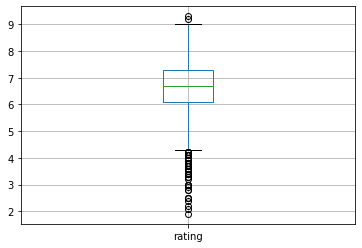

In [37]:
movies_ratings.boxplot(column=['rating'])

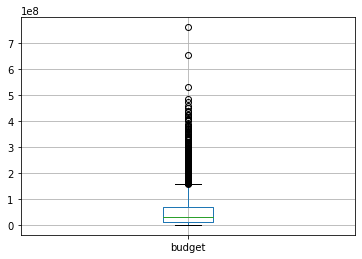

In [38]:
movies_ratings.boxplot(column=['budget'])

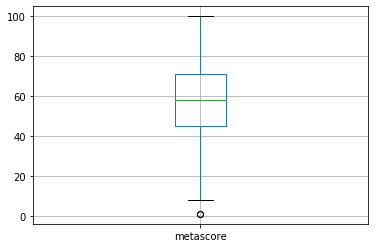

In [39]:
movies_ratings.boxplot(column=['metascore'])

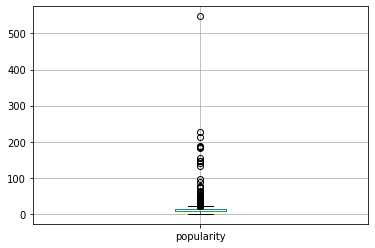

In [40]:
movies_ratings.boxplot(column=['popularity'])

In [41]:
# We will remove the outlier popularity observation from the dataset
movies_ratings = movies_ratings[movies_ratings.popularity < 300]


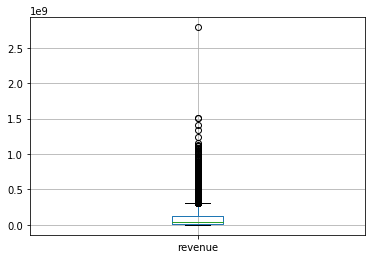

In [42]:
movies_ratings.boxplot(column=['revenue'])

In [43]:
movies_ratings['title'] = movies_ratings['title'].astype('str')
movies_ratings["year"] = movies_ratings["year"].astype('category')
movies_ratings["director"] = movies_ratings["director"].astype('category')
movies_ratings["adult"] = movies_ratings["adult"].astype('category')
movies_ratings["original_language"] = movies_ratings["original_language"].astype('category')


In [44]:
movies_ratings.to_csv('movies_ratings.csv')

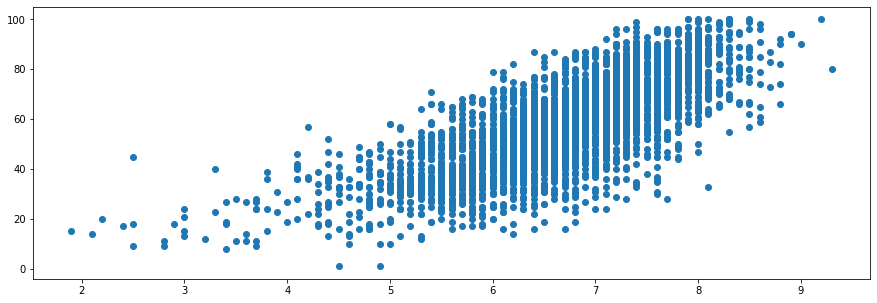

In [45]:
#Ratings vs Metascore
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('rating','metascore',data=movies_ratings)

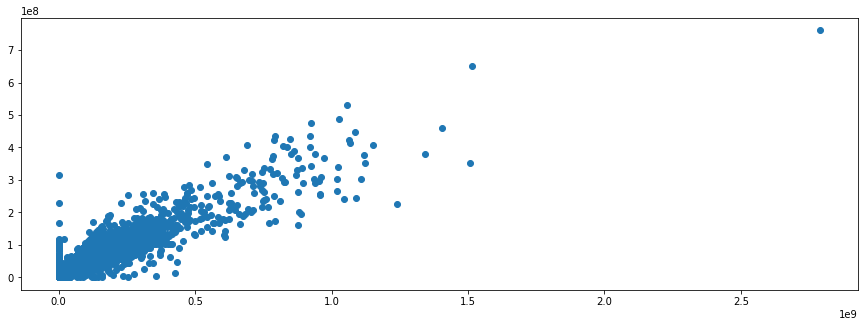

In [46]:
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('revenue','budget',data=movies_ratings)

Text(0.5, 1.0, 'Distribution of Ratings')

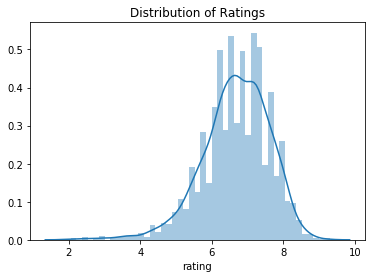

In [47]:
import seaborn as sns
sns.distplot(movies_ratings['rating']).set_title('Distribution of Ratings')

Text(0.5, 1.0, 'Distribution of metascore')

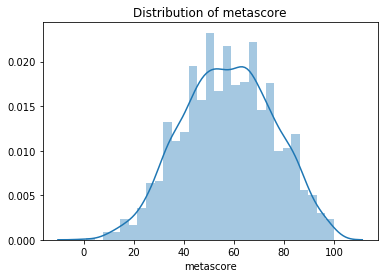

In [48]:
sns.distplot(movies_ratings['metascore']).set_title('Distribution of metascore')

Text(0.5, 1.0, 'Distribution of Duration')

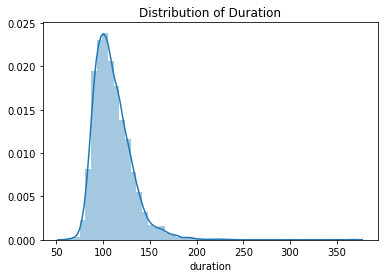

In [49]:
sns.distplot(movies_ratings['duration']).set_title('Distribution of Duration')

Text(0.5, 1.0, 'Distribution of budget')

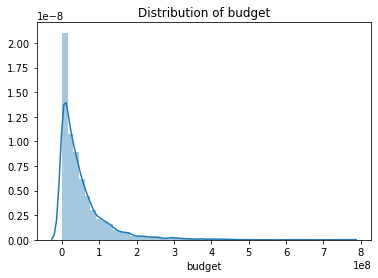

In [50]:
sns.distplot(movies_ratings['budget']).set_title('Distribution of budget')

Text(0.5, 1.0, 'Distribution of revenue')

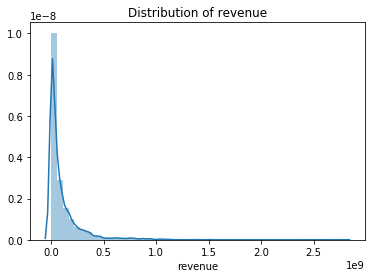

In [51]:
sns.distplot(movies_ratings['revenue']).set_title('Distribution of revenue')

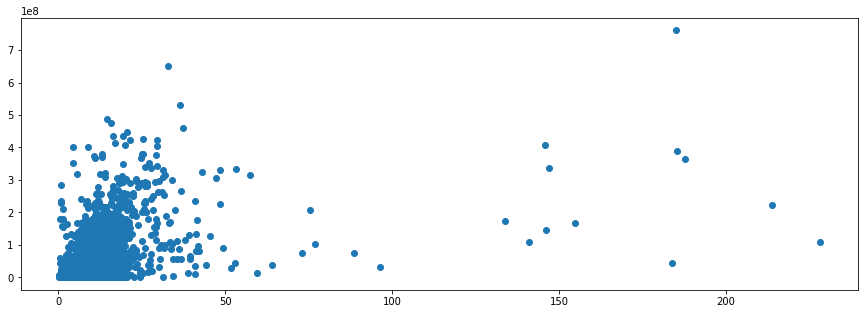

In [52]:
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('popularity','budget',data=movies_ratings)

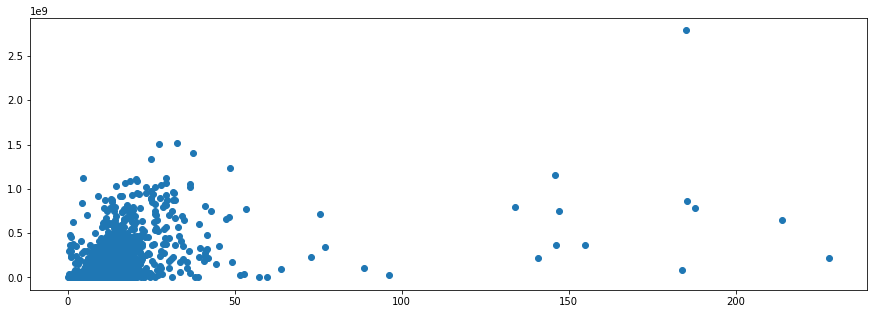

In [53]:
fig, ax=plt.subplots(1, figsize=(15,5))
ax.scatter('popularity','revenue',data=movies_ratings)

<BarContainer object of 25 artists>

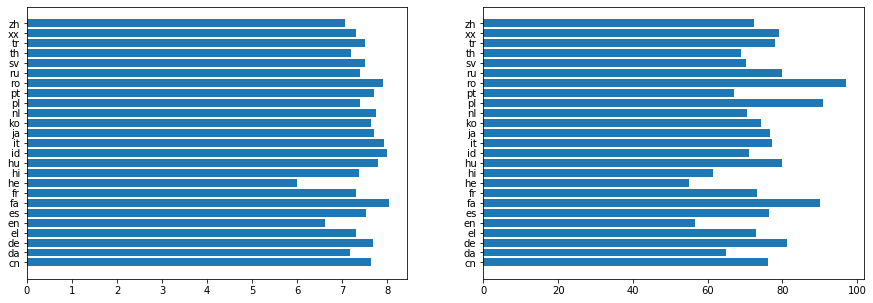

In [58]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].barh('original_language','rating',data=movies_ratings.groupby('original_language',as_index=False).mean())
ax[1].barh('original_language','metascore',data=movies_ratings.groupby('original_language',as_index=False).mean())

In [60]:
movies_ratings.groupby('year',as_index=False).mean()

,year,duration,rating,budget,metascore,popularity,revenue
0,1931,87.000000,8.500000,2.000000e+04,99.000000,10.891524,1.918100e+04
1,1934,105.000000,8.100000,4.360000e+06,87.000000,6.465257,4.500000e+06
2,1936,87.000000,8.500000,1.600000e+05,96.000000,8.159556,8.500000e+06
3,1937,83.000000,7.600000,1.849300e+08,95.000000,16.263878,1.849255e+08
4,1938,102.000000,7.900000,3.980000e+06,97.000000,10.685036,3.981000e+06
...,...,...,...,...,...,...,...
74,2013,108.980000,6.610667,5.152760e+07,55.693333,11.309500,1.178642e+08
75,2014,110.244604,6.674101,5.687489e+07,56.474820,18.114108,1.456569e+08
76,2015,111.379845,6.519380,5.293550e+07,56.193798,13.534978,1.353585e+08
77,2016,110.047337,6.587574,5.240231e+07,58.579882,15.433255,1.341463e+08


In [61]:
movies_ratings.groupby('original_language',as_index=False).mean()

,original_language,duration,rating,budget,metascore,popularity,revenue
0,cn,97.333333,7.633333,5.994444e+06,76.111111,7.772212,2.597656e+07
1,da,122.545455,7.172727,8.481818e+06,65.000000,8.189487,2.408956e+07
2,de,134.777778,7.677778,4.945556e+06,81.333333,7.484911,2.891298e+07
3,el,97.000000,7.300000,1.100000e+05,73.000000,17.713581,1.101970e+05
4,en,109.956615,6.626123,5.603991e+07,56.672777,11.338017,1.114427e+08
5,es,110.916667,7.541667,8.336667e+06,76.333333,9.393017,2.704313e+07
6,fa,123.500000,8.050000,4.750000e+06,90.000000,6.806685,1.201034e+06
7,fr,109.788462,7.321154,4.324808e+06,73.096154,8.028222,1.887577e+07
8,he,95.000000,6.000000,5.700000e+05,55.000000,3.212952,0.000000e+00
9,hi,167.857143,7.385714,3.977143e+06,61.571429,7.778508,2.852579e+07
